# Comparison between gas-powered and fully electric Ford F-150s

The Ford F-150 is the best selling vehicle in the USA. With the new electric F-150 Lightning joining the lineup of gas-powered and hybrid trucks, we can perform an apples to apples comparison of the fuel costs of driving gas-powered and electric vehicles. 

For now, electric vehicles are more expensive up front than the more common gas-powered vehicles, but they are less expensive to drive due to the lower fuel costs. As such, for a given vehicle and amount of driving where the money savings from driving an electric vehicle could offset the initial cost difference, making the electric vehicle overall more economical to own. 

__For the Ford F-150 and typical driving amounts, how long would it take for the F-150 lightning to cost less than the equivalent Gas-powered F-150?__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown as md

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Load data

In [3]:
# Get vehicles database from Fueleconomy.gov
url_cars = 'https://www.fueleconomy.gov/feg/epadata/vehicles.csv'
cars = pd.read_csv(url_cars, low_memory=False)

In [4]:
# Get monthly residential electricity data from US Energy Information Administration
elec_url = 'https://www.eia.gov/electricity/data/eia861m/xls/sales_revenue.xlsx'
us_elec = pd.read_excel(elec_url, sheet_name='US-YTD', usecols='A:C, G', 
                            skiprows=2, skipfooter=1)

# Price in Cents/kWh
us_elec = us_elec.rename(columns={'Cents/kWh': 'price'})

# Remove yearly average
us_elec = us_elec[us_elec['MONTH'] != '.']

# Change date information into Datetime
us_elec['day'] = '1'
us_elec['period'] = pd.to_datetime(us_elec[['Year', 'MONTH', 'day']])
us_elec = us_elec.drop(['Year', 'MONTH', 'day'], axis=1)

us_elec.sort_values(by='period', inplace=True)

In [5]:
# Get weekly gas prices from US Energy Information Administration
url_gas = 'https://www.eia.gov/petroleum/gasdiesel/xls/pswrgvwall.xls'
gas_prices = pd.read_excel(url_gas, sheet_name='Data 1', skiprows=2, parse_dates=['Date'])

# Rename columns
columns = gas_prices.columns.values.tolist()

sub1 = 'Weekly '
sub2 = ' Regular'

new_column = []
for name in columns:
    if sub1 in name:

        # get index of substrings
        idx1 = name.index(sub1)
        idx2 = name.index(sub2)

        new_name = name[idx1 + len(sub1): idx2]
        new_column += [new_name]
        
    else:
        new_column += [name]

column_dict = dict(zip(columns, new_column))

gas_prices = gas_prices.rename(columns=column_dict)

## Select cars to compare

In [6]:
# Get unique years and makes from the cars database
years = sorted(cars['year'].unique())
makes = cars['make'].str.lower().unique()

In [7]:
columns = ['id', 'model', 'fuelType', 'drive', 'cylinders', 'displ', 'trany', 'city08', 'highway08', 
                     'evMotor', 'rangeCity', 'rangeHwy']

In [8]:
cars[(cars['year'] == 2022) & (cars['make'] == 'Ford') & (cars['model'].str.contains('150'))][columns]

,id,model,fuelType,drive,cylinders,displ,trany,city08,highway08,evMotor,rangeCity,rangeHwy
38307,44865,F150 Pickup 2WD,Regular,Rear-Wheel Drive,6.0,2.7,Automatic (S10),20,26,NaN,0.0,0.0
38308,44866,F150 Pickup 2WD FFV,Gasoline or E85,Rear-Wheel Drive,6.0,3.3,Automatic (S10),19,24,NaN,0.0,0.0
38309,44867,F150 Pickup 2WD,Regular,Rear-Wheel Drive,6.0,3.5,Automatic (S10),18,24,NaN,0.0,0.0
38310,44868,F150 Pickup 2WD FFV,Gasoline or E85,Rear-Wheel Drive,8.0,5.0,Automatic (S10),17,24,NaN,0.0,0.0
38311,44869,F150 Pickup 2WD,Regular,Rear-Wheel Drive,6.0,3.5,Automatic (S10),17,24,NaN,0.0,0.0
38313,44870,F150 Pickup 2WD FFV,Gasoline or E85,Rear-Wheel Drive,8.0,5.0,Automatic (S10),17,24,NaN,0.0,0.0
38314,44871,F150 Pickup 4WD,Regular,Part-time 4-Wheel Drive,6.0,2.7,Automatic (S10),19,24,NaN,0.0,0.0
38315,44872,F150 Pickup 4WD FFV,Gasoline or E85,Part-time 4-Wheel Drive,6.0,3.3,Automatic (S10),19,22,NaN,0.0,0.0
38316,44873,F150 Pickup 4WD,Regular,Part-time 4-Wheel Drive,6.0,3.5,Automatic (S10),18,23,NaN,0.0,0.0
38317,44874,F150 Pickup 4WD FFV,Gasoline or E85,Part-time 4-Wheel Drive,8.0,5.0,Automatic (S10),16,22,NaN,0.0,0.0


In [9]:
# Select cars from the cars database using their ID values

# Gas
car1_id = 44873
# Hybrid
car2_id = 44940
# Electric
car3_id = 45318

car1 = cars[cars['id'] == car1_id].iloc[0]
car2 = cars[cars['id'] == car2_id].iloc[0]
car3 = cars[cars['id'] == car3_id].iloc[0]

# Get vehicle names
car1_name = str(car1['year']) + ' ' + car1['make'] + ' ' + car1['model']
car2_name = str(car2['year']) + ' ' + car2['make'] + ' ' + car2['model']
car3_name = str(car3['year']) + ' ' + car3['make'] + ' ' + car3['model']

print(f'car1: {car1_name}')
print(f'car2: {car2_name}')
print(f'car3: {car3_name}')

car1: 2022 Ford F150 Pickup 4WD
car2: 2022 Ford F150 Pickup 4WD HEV
car3: 2022 Ford F-150 Lightning 4WD


### Ford F-150 prices from Ford website on August 26, 2022
F-150 Lightning standard range, XLT (38808) MSRP: $61769

F-150 XLT, 4x4 3.5 L ICE (38316) MSRP: $57645

F-150 XLT, 4x4, Hybrid (38391) MSRP: $59405

In [10]:
# Dataframe of F-150 prices
msrp = pd.DataFrame({'price':[61769, 57645, 59405]},
                    index=['F-150 Lightning', 'F-150', 'F-150 Hybrid'])

In [11]:
# Separate different vehicle types for plotting
ev = cars[cars['fuelType1'] == 'Electricity']
ice = cars[(cars['fuelType1'] != 'Electricity') & (cars['fuelType2'] != 'Electricity') & \
           (cars['atvType'] != 'Hybrid')]
phev = cars[cars['atvType'] == 'Plug-in Hybrid']
hybrids = cars[cars['atvType'] == 'Hybrid']

### How do these trucks compare to other vehicles?

Comparison of the selected Ford F-150s with all vehicles in the database

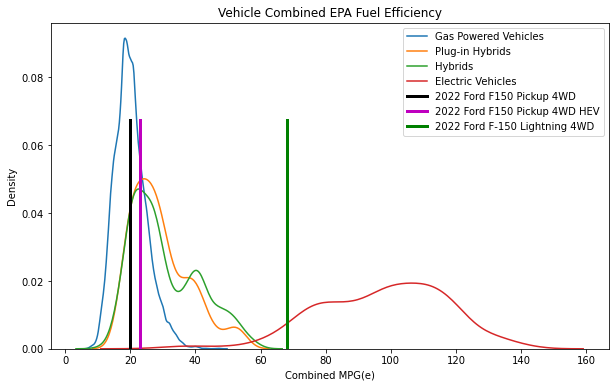

In [12]:
# Plot to compare EPA estimated fuel efficiency of selected cars with entire cars database
plt.subplots(figsize=(10, 6))
sns.kdeplot(x='comb08', data=ice)
sns.kdeplot(x='comb08', data=phev)
sns.kdeplot(x='comb08', data=hybrids)
sns.kdeplot(x='comb08', data=ev)
plt.axvline(car1['comb08'], 0, 0.7, c='k', linewidth=3)
plt.axvline(car2['comb08'], 0, 0.7, c='m', linewidth=3)
plt.axvline(car3['comb08'], 0, 0.7, c='g', linewidth=3)
plt.legend(['Gas Powered Vehicles', 'Plug-in Hybrids', 'Hybrids', 'Electric Vehicles',
            car1_name, car2_name, car3_name], loc='upper right')
plt.title('Vehicle Combined EPA Fuel Efficiency')
plt.xlabel('Combined MPG(e)');

The gas an hybrid F-150s have pretty average fuel efficiencies compared with the cars in the database. The F-150 Lightning has better fuel efficiency than the gas and hybrid F-150s, but is on the lower end of fuel efficiencies for electric vehicles as a whole. This is to be expected as the Lightning is one of the largest fully electric vehicle in the database.

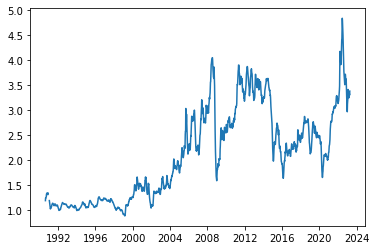

In [27]:
plt.plot(gas_prices['Date'], gas_prices['U.S.']);

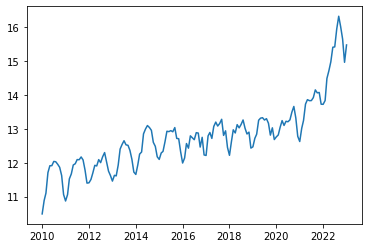

In [28]:
plt.plot(us_elec['period'], us_elec['price']);

In [38]:
# 3 year average gas and electricity prices
gas_3_year_mean = round(gas_prices['U.S.'].iloc[-(52 * 3):].mean(), 2)
gas_3_year_std = round(gas_prices['U.S.'].iloc[-(52 * 3):].std(), 2)

elec_3_year_mean = round(us_elec['price'].iloc[-(52 * 3):].mean(), 2)
elec_3_year_std = round(us_elec['price'].iloc[-(52 * 3):].std(), 2)

### This might not be needed...

In [14]:
# Resample gas prices to give the average monthly price to be the same as electricity prices
gas_prices_resample = gas_prices.resample('MS', on='Date').mean()

# US fuel and electricity prices
us_prices = pd.merge(gas_prices_resample['U.S.'], us_elec[['period', 'price']], 
                         left_on='Date', right_on='period')
us_prices = us_prices.rename(columns={'U.S.': 'gas', 'price': 'electricity'})

# Forecasts

Full forecasts can be found in the Forecasts notebook

Just get rid of this! Just use an average for the last few years like in the Dash app

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [17]:
# US gas and electric prices
gas_prices_resample.reset_index(inplace=True)
gas_all = gas_prices_resample[['Date', 'U.S.']]
gas_all = gas_all.set_index(pd.DatetimeIndex(gas_all['Date']))
gas_all = gas_all.drop('Date', axis=1)

electric_all = us_elec[['period', 'price']]

format = '%Y-%m-%d %H:%M:%S'

electric_all.loc['period'] = pd.to_datetime(electric_all['period'], format=format)
electric_all = electric_all.set_index(pd.DatetimeIndex(electric_all['period']).to_period('M'))
electric_all = electric_all.drop('period', axis=1)
electric_all = electric_all.dropna()

## Average US electricity price forecast

In [18]:
# Seasonal SARIMA model for US electricity prices
electric_model = SARIMAX(electric_all, order=(0,1,1), seasonal_order=(0,1,1,12), intercept=True)
electric_all_results = electric_model.fit()

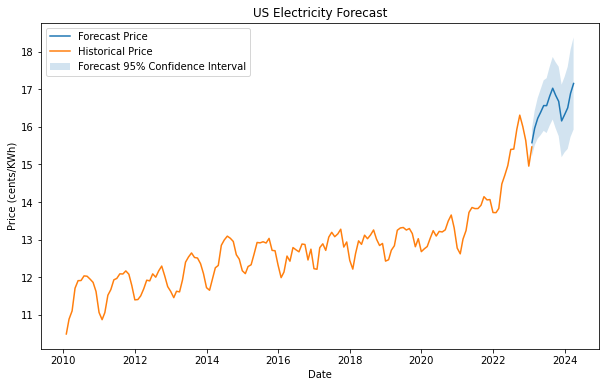

In [19]:
from dateutil.relativedelta import relativedelta

# Find date of the last electricity price and add one month to it
start_date = electric_all.index.array[-1].to_timestamp() + relativedelta(months=1)

# Forecast out 15 months
forecast_dates = pd.date_range(start=start_date, periods=15, freq='MS')
electric_all_pred = electric_all_results.get_forecast(steps=15, dynamic=True)
electric_all_pred_mean = electric_all_pred.predicted_mean
electric_all_conf = electric_all_pred.conf_int().set_index(forecast_dates)

# DataFrame of forecast results
electric_all_forecast = pd.DataFrame(electric_all_pred_mean).set_index(forecast_dates)
electric_all_forecast = pd.concat([electric_all_forecast, electric_all_conf], axis=1)
electric_all_forecast.rename({'predicted_mean': 'electricity_forecast', 
                             'lower price': 'electricity_low', 'upper price': 'electricity_high'}, 
                             axis=1, inplace=True)

# plot forecast with actual data
plt.subplots(figsize=(10,6))
plt.plot(electric_all_forecast.index, electric_all_forecast['electricity_forecast'])
plt.fill_between(electric_all_forecast.index, electric_all_forecast['electricity_low'], 
                 electric_all_forecast['electricity_high'], alpha=0.2)
plt.plot(electric_all.index, electric_all['price'])
plt.xlabel('Date')
plt.ylabel('Price (cents/KWh)')
plt.title('US Electricity Forecast')
plt.legend(['Forecast Price', 'Historical Price', 'Forecast 95% Confidence Interval'], loc='upper left');

## Gas Forecast

In [20]:
# Take the log of the US gas prices to achieve stationarity of variance
gas_log_all = np.log(gas_all)

# Non-seasonal ARIMA model for US gas prices
gas_model = SARIMAX(gas_log_all, order=(0,1,1), intercept=True, freq='MS')

gas_results = gas_model.fit()

/Users/richardbradshaw/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


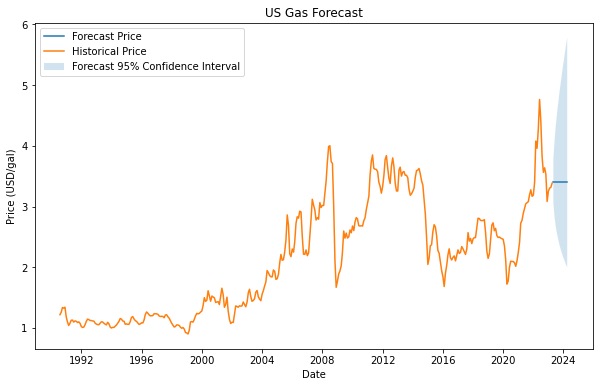

In [21]:
# Find date of the last gas price and add one month to it
start_date_gas = gas_all.index.array[-1] + relativedelta(months=1)
forecast_dates_gas = pd.date_range(start=start_date_gas, periods=12, freq='MS')

# Forecast out 12 months
gas_forecast = gas_results.get_forecast(steps=12, dynamic=True)
gas_pred = gas_forecast.predicted_mean
gas_conf = gas_forecast.conf_int()

# Convert forecast log prices back to actual prices
gas_pred = np.exp(gas_pred)
gas_conf = np.exp(gas_conf)

# DataFrame of forecast results
gas_US_forecast = pd.DataFrame(gas_pred).set_index(forecast_dates_gas)
gas_US_forecast = pd.concat([gas_US_forecast, gas_conf], axis=1)
gas_US_forecast.rename({'predicted_mean': 'gas_forecast', 
                             'lower U.S.': 'gas_low', 'upper U.S.': 'gas_high'}, 
                             axis=1, inplace=True)

# plot forecast with actual data
plt.subplots(figsize=(10,6))
plt.plot(gas_pred)
plt.fill_between(gas_conf.index, gas_conf['lower U.S.'], gas_conf['upper U.S.'], alpha=0.2)
plt.plot(gas_all)
plt.xlabel('Date')
plt.ylabel('Price (USD/gal)')
plt.title('US Gas Forecast')
plt.legend(['Forecast Price', 'Historical Price', 'Forecast 95% Confidence Interval'], loc='upper left');

In [24]:
US_forecasts = pd.merge(electric_all_forecast, gas_US_forecast, how='right', 
                        left_index=True, right_index=True).round(2)

### Simplify this

- Don't need to do the forecast anymore, so can take that out
- Also get rid of the weekend/weekday stuff, since I'm assuming the average daily driving distances

In [95]:
def fuel_cost_calc(car_in, driving_in):
    '''function to calculate estimated annual fuel costs for different vehicles.
    
    Args:
        car_in (Pandas Series): series that contains all the vehicle information from the cars DataFrame for 
                            the selected car     
        driving_in (List): List that contains the daily miles driven by driving type. 
                        [highway miles, city miles]
    
    Returns:
        Mean and standard deviation of the annual estimated fuel costs.
    '''
    
    highway_miles = driving_in[0]
    city_miles = driving_in[1]

    # Electric vehicle calculation
    if car_in['fuelType1'] == 'Electricity':
        
        # electricity consumption in kWH/mile
        highway_E = car_in['highwayE'] / 100
        city_E = car_in['cityE'] / 100
        
        highway_electricity_consumption = highway_miles * highway_E
        city_electricity_consumption = city_miles * city_E
        
        # US average fuel prices
        annual_cost = (((highway_miles * highway_E) + (city_miles * city_E)) 
                  * (elec_3_year_mean / 100) * 365)

        annual_cost_std = (((highway_miles * highway_E) + (city_miles * city_E)) 
                  * (elec_3_year_std / 100) * 365)
        
    # Gas-powered vehicle calculation
    else:
        # Fuel Efficiency
        highway_mpg = car_in['highway08']
        city_mpg = car_in['city08']
        
        # US fuel prices
        annual_cost = (((highway_miles / highway_mpg) + (city_miles / city_mpg)) 
                    * 365 * gas_3_year_mean)

        annual_cost_std = (((highway_miles / highway_mpg) + (city_miles / city_mpg)) 
                    * 365 * gas_3_year_std)

    return annual_cost.astype('int'), annual_cost_std.astype('int')

# Fuel Cost Analysis

Drivers in the USA drove an average of 13,500 miles per driver in 2018 (https://www.fhwa.dot.gov/ohim/onh00/bar8.htm). This results in driving an average of 37 miles per day. The following will calculate the estimated fuel costs for the average driver in the USA. I will estimate the two end-member driving types of only city driving and only highway driving. The actual average commute will likely be somewhere in the middle.

In [74]:
# Daily mileage: [Highway, City]

# 37 miles per day of city driving
miles_c = [0, 37]

# 37 miles per day of highway driving
miles_h = [37, 0]

In [112]:
# calculated annual fuel costs for each vehicle for highway and city driving

car1_cost_mean_highway, car1_cost_std_highway = fuel_cost_calc(car1, miles_h)
car1_cost_mean_city, car1_cost_std_city = fuel_cost_calc(car1, miles_c)

car2_cost_mean_highway, car2_cost_std_highway = fuel_cost_calc(car2, miles_h)
car2_cost_mean_city, car2_cost_std_city = fuel_cost_calc(car2, miles_c)

car3_cost_mean_highway, car3_cost_std_highway = fuel_cost_calc(car3, miles_h)
car3_cost_mean_city, car3_cost_std_city = fuel_cost_calc(car3, miles_c)

### Need new plots

- bar plot to compare the three trucks?
- Total vehicle cost line plot extrapolated out until they start to cross over

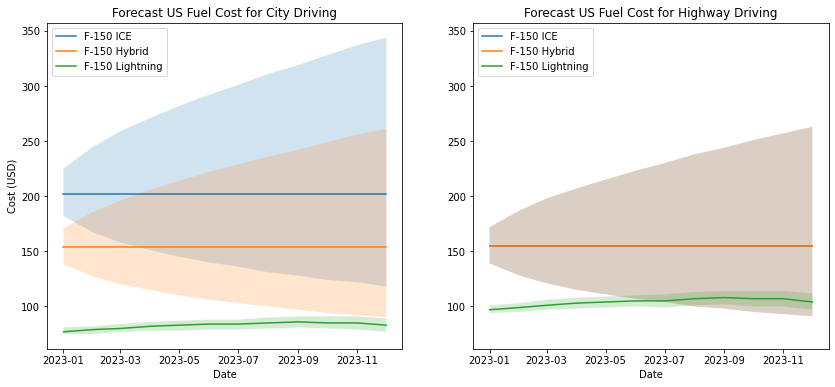

In [29]:
# Plots of monthly forecasted fuel costs for each vehicle

plt.subplots(figsize=(14,6))
ax1 = plt.subplot(121)
ax1.plot(car1_forecast_city['forecast'])
ax1.fill_between(car1_forecast_city.index, car1_forecast_city['low'], 
                 car1_forecast_city['high'], alpha=0.2)
ax1.plot(car2_forecast_city['forecast'])
ax1.fill_between(car2_forecast_city.index, car2_forecast_city['low'], 
                 car2_forecast_city['high'], alpha=0.2)
ax1.plot(car3_forecast_city['forecast'])
ax1.fill_between(car3_forecast_city.index, car3_forecast_city['low'], 
                 car3_forecast_city['high'], alpha=0.2)

ax1.set_xlabel('Date')
ax1.set_ylabel('Cost (USD)')
ax1.legend(['F-150 ICE', 'F-150 Hybrid', 'F-150 Lightning'], loc='upper left')
ax1.set_title('Forecast US Fuel Cost for City Driving')


ax2 = plt.subplot(122, sharey=ax1)
ax2.plot(car1_forecast_highway['forecast'])
ax2.fill_between(car1_forecast_highway.index, car1_forecast_highway['low'], 
                 car1_forecast_highway['high'], alpha=0.2)
ax2.plot(car2_forecast_highway['forecast'])
ax2.fill_between(car2_forecast_highway.index, car2_forecast_highway['low'], 
                 car2_forecast_highway['high'], alpha=0.2)
ax2.plot(car3_forecast_highway['forecast'])
ax2.fill_between(car3_forecast_highway.index, car3_forecast_highway['low'], 
                 car3_forecast_highway['high'], alpha=0.2)
ax2.set_xlabel('Date')
ax2.legend(['F-150 ICE', 'F-150 Hybrid', 'F-150 Lightning'], loc='upper left')
ax2.set_title('Forecast US Fuel Cost for Highway Driving');

In [30]:
# Forecasted total annual fuel costs for highway and city driving

car1_sum_city = car1_forecast_city.sum().astype(int)
car2_sum_city = car2_forecast_city.sum().astype(int)
car3_sum_city = car3_forecast_city.sum().astype(int)

totals_city = pd.DataFrame([car1_sum_city, car2_sum_city, car3_sum_city], 
                      index=['F-150', 'F-150 Hybrid', 'F-150 Lightning'])

car1_sum_highway = car1_forecast_highway.sum().astype(int)
car2_sum_highway = car2_forecast_highway.sum().astype(int)
car3_sum_highway = car3_forecast_highway.sum().astype(int)

totals_highway = pd.DataFrame([car1_sum_highway, car2_sum_highway, car3_sum_highway], 
                      index=['F-150', 'F-150 Hybrid', 'F-150 Lightning'])

In [31]:
totals_city

,forecast,low,high,co2
F-150,2424,1702,3514,5988
F-150 Hybrid,1848,1292,2668,5208
F-150 Lightning,993,938,1048,0


In [32]:
totals_highway

,forecast,low,high,co2
F-150,1860,1302,2685,5988
F-150 Hybrid,1860,1302,2685,5208
F-150 Lightning,1247,1182,1315,0


In [33]:
# calculate how much more expensive fuel is for the gas-powered F-150 than the Lightning for city and highway driving
city_EV_gas_factor = (totals_city.loc['F-150']['forecast'] \
                      / totals_city.loc['F-150 Lightning']['forecast']).round(1)

highway_EV_gas_factor = (totals_highway.loc['F-150']['forecast'] \
                         / totals_highway.loc['F-150 Lightning']['forecast']).round(1)

In [34]:
# Forecasted total vehicle costs (MSRP + forecasted fuel costs) for highway and city driving

f150_cost_highway = car1_forecast_highway.drop('co2', axis=1).cumsum() \
+ msrp.loc['F-150']['price']
f150_hybrid_cost_highway = car2_forecast_highway.drop('co2', axis=1).cumsum() \
+ msrp.loc['F-150 Hybrid']['price']
lightning_standard_cost_highway = car3_forecast_highway.drop('co2', axis=1).cumsum() \
+ msrp.loc['F-150 Lightning']['price']


f150_cost_city = car1_forecast_city.drop('co2', axis=1).cumsum() \
+ msrp.loc['F-150']['price']
f150_hybrid_cost_city = car2_forecast_city.drop('co2', axis=1).cumsum() \
+ msrp.loc['F-150 Hybrid']['price']
lightning_standard_cost_city = car3_forecast_city.drop('co2', axis=1).cumsum() \
+ msrp.loc['F-150 Lightning']['price']

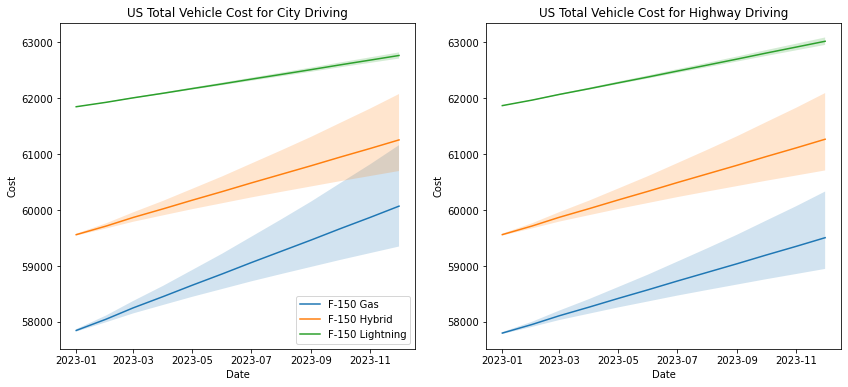

In [35]:
# Plots of forecasted total vehicle costs (MSRP + forecasted fuel costs) for highway and city driving

plt.subplots(figsize=(14,6))
ax1 = plt.subplot(121)
ax1.plot(f150_cost_city['forecast'])
ax1.fill_between(f150_cost_city.index, f150_cost_city['low'], f150_cost_city['high'], alpha=0.2)

ax1.plot(f150_hybrid_cost_city['forecast'])
ax1.fill_between(f150_hybrid_cost_city.index, f150_hybrid_cost_city['low'], 
                 f150_hybrid_cost_city['high'], alpha=0.2)

ax1.plot(lightning_standard_cost_city['forecast'])
ax1.fill_between(lightning_standard_cost_city.index, lightning_standard_cost_city['low'], 
                 lightning_standard_cost_city['high'], alpha=0.2)

ax1.legend(['F-150 Gas', 'F-150 Hybrid', 'F-150 Lightning'], loc='lower right')
ax1.set_title('US Total Vehicle Cost for City Driving')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cost')

ax2 = plt.subplot(122, sharey=ax1)
ax2.plot(f150_cost_highway['forecast'])
ax2.fill_between(f150_cost_highway.index, f150_cost_highway['low'], f150_cost_highway['high'], alpha=0.2)

ax2.plot(f150_hybrid_cost_highway['forecast'])
ax2.fill_between(f150_hybrid_cost_highway.index, f150_hybrid_cost_highway['low'], 
                 f150_hybrid_cost_highway['high'], alpha=0.2)

ax2.plot(lightning_standard_cost_highway['forecast'])
ax2.fill_between(lightning_standard_cost_highway.index, lightning_standard_cost_highway['low'], 
                 lightning_standard_cost_highway['high'], alpha=0.2)

ax2.set_title('US Total Vehicle Cost for Highway Driving')
ax2.set_xlabel('Date')
ax2.set_ylabel('Cost');

In [36]:
# annual fuel cost totals
fuel_totals_city = totals_city.drop('co2', axis=1)
fuel_totals_highway = totals_highway.drop('co2', axis=1)

In [37]:
def compare(fuel_totals):
    '''Function to calculate how long it would take for the total vehicle cost (MSRP + fuel costs) of the 
    gas-powered F-150 to overtake the costs of the F-150 lightning and F-150 hybrid.
    
    variables:
        fuel_totals (DataFrame): DataFrame of total annual forecasted fuel costs for each vehicle 
                                (fuel_totals_city or fuel_totals_highway).
                            
    Returns:
        df: returns two dataframes with the number of years it is forecast for the gas-powered F-150 to 
            cost more than the F-150 Lightning and the F-150 hybrid and the total vehicle costs for both vehicles 
            and the total fuel costs for both vehicles.
    '''

    temp_EV_gas = pd.DataFrame(index=['years', 'total EV cost', 'total ICE cost', 
                                         'EV fuel cost', 'ICE fuel cost'], 
                                 columns=[fuel_totals_city.columns])
    temp_hybrid_gas = pd.DataFrame(index=['years', 'total EV cost', 'total ICE cost', 
                                         'EV fuel cost', 'ICE fuel cost'], 
                                 columns=[fuel_totals_city.columns])

    for col in fuel_totals.columns:

        x1 = msrp.loc['F-150 Lightning']['price']
        x2 = msrp.loc['F-150 Hybrid']['price']
        y = msrp.loc['F-150']['price']
        cost_x1 = fuel_totals.loc['F-150 Lightning'][col]
        cost_x2 = fuel_totals.loc['F-150 Hybrid'][col]
        cost_y = fuel_totals.loc['F-150'][col]

        years_1 = 0
        if cost_x1 == cost_y:
            temp_EV_gas[col] = 'Fuel costs are the same'
        else: 
            while x1 > y:
                x1 = x1 + cost_x1
                y = y + cost_y
                years_1 += 1

                if x1 <= y:
                    temp_EV_gas.loc['years'][col] = years_1
                    temp_EV_gas.loc['total EV cost'][col] = x1
                    temp_EV_gas.loc['total ICE cost'][col] = y
                    temp_EV_gas.loc['EV fuel cost'][col] = cost_x1 * years_1
                    temp_EV_gas.loc['ICE fuel cost'][col] = cost_y * years_1

        y = msrp.loc['F-150']['price']
        years_2 = 0
        if cost_x2 == cost_y:
            temp_hybrid_gas[col] = 'Fuel costs are the same'
        else: 
            while x2 > y:
                x2 = x2 + cost_x2
                y = y + cost_y
                years_2 += 1

                if x2 <= y:
                    temp_hybrid_gas.loc['years'][col] = years_2
                    temp_hybrid_gas.loc['total EV cost'][col] = x2
                    temp_hybrid_gas.loc['total ICE cost'][col] = y
                    temp_hybrid_gas.loc['EV fuel cost'][col] = cost_x2 * years_2
                    temp_hybrid_gas.loc['ICE fuel cost'][col] = cost_y * years_2
                    
    return temp_EV_gas, temp_hybrid_gas

In [38]:
compare_EV_gas_city, compare_hybrid_gas_city = compare(fuel_totals_city)
compare_EV_gas_highway, compare_hybrid_gas_highway = compare(fuel_totals_highway)

In [39]:
compare_EV_gas_city

,forecast,low,high
years,3,6,2
total EV cost,64748,67397,63865
total ICE cost,64917,67857,64673
EV fuel cost,2979,5628,2096
ICE fuel cost,7272,10212,7028


In [40]:
compare_EV_gas_highway

,forecast,low,high
years,7,35,4
total EV cost,70498,103139,67029
total ICE cost,70665,103215,68385
EV fuel cost,8729,41370,5260
ICE fuel cost,13020,45570,10740


In [41]:
compare_hybrid_gas_city

,forecast,low,high
years,4,5,3
total EV cost,66797,65865,67409
total ICE cost,67341,66155,68187
EV fuel cost,7392,6460,8004
ICE fuel cost,9696,8510,10542


In [42]:
compare_hybrid_gas_highway

,forecast,low,high
years,Fuel costs are the same,Fuel costs are the same,Fuel costs are the same
total EV cost,Fuel costs are the same,Fuel costs are the same,Fuel costs are the same
total ICE cost,Fuel costs are the same,Fuel costs are the same,Fuel costs are the same
EV fuel cost,Fuel costs are the same,Fuel costs are the same,Fuel costs are the same
ICE fuel cost,Fuel costs are the same,Fuel costs are the same,Fuel costs are the same


In [43]:
city_EV_time_savings = compare_EV_gas_city.loc['years']['forecast']
highway_EV_time_savings = compare_EV_gas_highway.loc['years']['forecast']

md(f'''## Conclusions
Currently, electric vehicles generally have a higher MSRP than equivalent gas-powered vehicles. \
But they are also generally less expensive to own due to lower fuel costs and less \
maintenance (oil changes, etc.). This analysis shows that with only taking into account fuel costs, \
the overall cost of driving the standard 2022 Ford F-150 Lightning XLT would be less than the \
overall cost of driving the equivalent gas-powered 2022 Ford F-150 XLT in only \
**{city_EV_time_savings} to {highway_EV_time_savings} years** for 37 miles per day of city or highway \
driving, respectively based on the forecast fuel prices for the next 12 months. Fuel for the \
2022 Ford F-150 Lightning XLT would cost **{city_EV_gas_factor} to {highway_EV_gas_factor} times** \
less than the gas-powered 2022 Ford F-150 XLT. This is based on the EPA estimated fuel efficiency for \
these trucks, which due to various factors, can be different than what you might [experience]\
(https://www.fueleconomy.gov/feg/why_differ.shtml).

This analysis only takes into account fuel costs, there are other costs that will affect the overall cost\
of owning any vehicle. The [federal EV tax credit](https://www.fueleconomy.gov/feg/taxevb.shtml) \
of up to $7,500 for qualifying new EV purchases (the Ford F-150 Lightning still qualifies for \
the full amount), would make the EV version less than the gas-powered F-150 from the initial purchase. \
However, the cost of purchasing and installing an in-home level 2 charger could be \
several thousand dollars, which would increase the total cost of owning the EV version.

This analysis also did not take into account maintenace costs, which are generally higher in \
gas-powered vehicles than EVs, between [20]() and [50%](https://betterenergy.org/blog/consumer\
-reports-study-finds-electric-vehicle-maintenance-costs-are-50-less-than-gas-powered-cars/), \
again favoring EVs for lower overall cost of ownership. 

This analysis only gives an estimate of the total cost of ownership of these vehicles and is meant as \
a comparison among three similar trucks using typical driving distances and estimates of fuel efficiency \
and average fuel costs in the US. Actual costs of driving these vehicles will vary depending on driving \
style, fuel quality, where you drive, etc. 
''')

## Conclusions
Currently, electric vehicles generally have a higher MSRP than equivalent gas-powered vehicles. But they are also generally less expensive to own due to lower fuel costs and less maintenance (oil changes, etc.). This analysis shows that with only taking into account fuel costs, the overall cost of driving the standard 2022 Ford F-150 Lightning XLT would be less than the overall cost of driving the equivalent gas-powered 2022 Ford F-150 XLT in only **3 to 7 years** for 37 miles per day of city or highway driving, respectively based on the forecast fuel prices for the next 12 months. Fuel for the 2022 Ford F-150 Lightning XLT would cost **2.4 to 1.5 times** less than the gas-powered 2022 Ford F-150 XLT. This is based on the EPA estimated fuel efficiency for these trucks, which due to various factors, can be different than what you might [experience](https://www.fueleconomy.gov/feg/why_differ.shtml).

This analysis only takes into account fuel costs, there are other costs that will affect the overall costof owning any vehicle. The [federal EV tax credit](https://www.fueleconomy.gov/feg/taxevb.shtml) of up to $7,500 for qualifying new EV purchases (the Ford F-150 Lightning still qualifies for the full amount), would make the EV version less than the gas-powered F-150 from the initial purchase. However, the cost of purchasing and installing an in-home level 2 charger could be several thousand dollars, which would increase the total cost of owning the EV version.

This analysis also did not take into account maintenace costs, which are generally higher in gas-powered vehicles than EVs, between [20]() and [50%](https://betterenergy.org/blog/consumer-reports-study-finds-electric-vehicle-maintenance-costs-are-50-less-than-gas-powered-cars/), again favoring EVs for lower overall cost of ownership. 

This analysis only gives an estimate of the total cost of ownership of these vehicles and is meant as a comparison among three similar trucks using typical driving distances and estimates of fuel efficiency and average fuel costs in the US. Actual costs of driving these vehicles will vary depending on driving style, fuel quality, where you drive, etc. 
